
### Explanation:

This code block installs and imports libraries essential for geospatial data manipulation, time series analysis, and data visualization. Each library is purposefully included for specific tasks within the broader data analysis pipeline.

1. **Package Installation**:
    - `!pip install geopy`, `!pip install fiona`, `!pip install shapely`, and `!pip install folium`: Installs required geospatial and mapping packages. 

2. **Geospatial Libraries**:
    - **geopandas** (`gpd`): Handles geospatial data in Python, extending the capabilities of pandas to work with spatial data.
    - **fiona**: Provides an API for reading and writing vector data in GIS, necessary for geospatial data operations.
    - **folium**: Creates interactive maps and visualizations, often used with geographical data.
    - **geopy.distance** and **shapely.geometry**: Calculate distances between coordinates and handle geometric shapes.

3. **System Libraries**:
    - **os** and **time**: Manage system-level tasks and timing within the script.

4. **Data Processing and Modeling Libraries**:
    - **pandas**: Used for structured data handling and DataFrame manipulation.
    - **SARIMAX** and **ExponentialSmoothing** from `statsmodels`: Perform time series forecasting, including seasonal ARIMA (SARIMA) and exponential smoothing.
    - **ARIMA** from `statsmodels`: A model for analyzing and forecasting univariate time series data.
    - **MinMaxScaler** from `sklearn.preprocessing`: Scales data to a normalized range, often used for preprocessing before analysis or modeling.

5. **Visualization Libraries**:
    - **matplotlib.pyplot** (`plt`): Visualizes data, enabling the generation of plots and charts.
    
6. **Additional Libraries**:
    - **numpy** (`np`): Supports array operations, mathematical functions, and random sampling, essential for numerical computations.


In [3]:
# !pip install geopy
# !pip install fiona
# !pip install shapely
# !pip install folium

import geopandas as gpd
import fiona
import folium
from geopy.distance import *
from shapely.geometry import *
import requests
import os
import time
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler



### Explanation:

This code block loads a geospatial dataset in `.gdb` format (a geodatabase format often used in GIS data) and reads it into a GeoDataFrame for analysis.

1. **Define Path to .gdb File**:
    - `gdb_path = "../data/raw/Fire_Feature_Data.gdb"`: Specifies the relative path to the geodatabase file containing fire-related spatial data.

2. **List Layers in Geodatabase**:
    - `fiona.listlayers(gdb_path)`: Lists all layers in the `.gdb` file to check available data layers. `fiona` is well-suited for this as it reads vector data and inspects file contents.

3. **Read Data into GeoDataFrame**:
    - `gpd.read_file(gdb_path, layer="USGS_Wildland_Fire_Combined_Dataset")`: Loads the specified layer (`USGS_Wildland_Fire_Combined_Dataset`) from the `.gdb` file into a GeoDataFrame (`fire_db`), making it compatible with pandas and geospatial operations in GeoPandas.

4. **Preview Data**:
    - `fire_db.head()`: Displays the first few rows of the data, providing an overview of the dataset's structure and contents.


In [4]:
#path to the .gdb file
gdb_path = "../data/raw/Fire_Feature_Data.gdb"

#checking 
print("layers present", fiona.listlayers(gdb_path))

#reading data in geopandas
fire_db = gpd.read_file(gdb_path, layer="USGS_Wildland_Fire_Combined_Dataset")

fire_db.head()


layers present ['USGS_Wildland_Fire_Combined_Dataset', 'USGS_Wildland_Fires_Overlapping_Fire_Data', 'USGS_Wildland_Fire_Merged_Dataset']


/opt/homebrew/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,Listed_Fire_Names,...,Wildfire_Notice,Prescribed_Burn_Notice,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,geometry
0,1,Wildfire,1860,1,1 (1),3940.207089,1594.545237,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),Big Quilcene River (1),...,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,None,None,0.047590,NaN,No,64888.449849,1.594545e+07,"MULTIPOLYGON (((-1883775.596 1194154.192, -188..."
1,2,Wildfire,1860,1,1 (1),772.518249,312.627044,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),Harrison Lake (1),...,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,None,None,0.071367,NaN,No,23462.288613,3.126270e+06,"MULTIPOLYGON (((-1887470.131 1187759.244, -188..."
2,3,Wildfire,1860,1,1 (1),333.020409,134.768578,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),Tunnel Creek (1),...,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,None,None,0.379578,NaN,No,6679.573569,1.347686e+06,"MULTIPOLYGON (((-1889386.119 1190683.928, -188..."
3,4,Wildfire,1870,1,"1 (1), 3 (1)",22294.993577,9022.463795,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (1)",1870 (2),...,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,None,None,0.158038,NaN,No,84700.719226,9.022464e+07,"MULTIPOLYGON (((-1428896.297 864980.034, -1428..."
4,5,Wildfire,1870,1,"1 (1), 3 (1)",36.985574,14.967531,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (1)",No Fire Name Provided (2),...,Wildfire mapping prior to 1984 was inconsisten...,Prescribed fire data in this dataset represent...,None,None,0.218009,NaN,No,2937.265383,1.496753e+05,"MULTIPOLYGON (((-1371410.414 595942.396, -1371..."


### Explanation:

This code snippet checks the coordinate reference system (CRS) of the geospatial data and, if necessary, converts it to the standard latitude-longitude system (EPSG:4326), which is commonly used for global mapping.

1. **Check Coordinate Reference System (CRS)**:
   - `fire_db.crs != "EPSG:4326"`: This condition verifies if the CRS of the `fire_db` GeoDataFrame is not already set to EPSG:4326.
   
2. **Convert to EPSG:4326**:
   - `fire_db.to_crs("EPSG:4326")`: Converts the GeoDataFrame to EPSG:4326 if needed, ensuring compatibility with global mapping tools and frameworks that typically require latitude-longitude coordinates.
   
This step is essential for accurate global positioning, especially when working with mapping libraries like Folium or plotting locations on a world map.


In [5]:
#fixing coordinate system - converting data to standard latitude-longitude for global mapping
if fire_db.crs != "EPSG:4326":
    fire_db = fire_db.to_crs("EPSG:4326")

#### Given city: Syracuse, NY
##### The following code blocks sets the given city of Syracuse, New York

### Explanation:

This code snippet defines a point based on specific coordinates, performs a reverse geocoding check, and then displays the point on an interactive map centered on those coordinates.

1. **Define Coordinates**:
   - `coordinates = (43.04, -76.14)`: Sets the latitude and longitude for the desired point, representing a location (possibly a city center).

2. **Create Point Geometry**:
   - `city_pt = Point(coordinates[1], coordinates[0])`: Uses Shapely’s `Point` to create a geographic point with longitude (x) and latitude (y), aligning with the (x, y) convention in geospatial data.

3. **Initialize Map**:
   - `m = folium.Map(location=coordinates, zoom_start=12)`: Initializes a Folium map centered at the given coordinates, with a moderate zoom level to show the city area.

4. **Add Marker to Map**:
   - `folium.Marker(location=coordinates).add_to(m)`: Places a marker on the map at the specified location, making it easy to visually verify the point of interest.

5. **Display Map**:
   - `m`: Displays the interactive map with the city marker, allowing for quick verification of the chosen coordinates.


In [7]:
coordinates = (43.04, -76.14)
city_pt = Point(coordinates[1], coordinates[0])

#reverse geocoding to check verify the assigned city
m = folium.Map(location=coordinates, zoom_start=12)

folium.Marker(
    location=coordinates).add_to(m)

m

### Explanation:

This code defines a function to calculate the distance between each fire location and a specified city point, then applies this function to add a new column with these distance values in miles.

1. **Define Distance Calculation Function**:
   - `distance_calc(fire_geometry, city_pt)`: This function calculates the distance in miles between the `fire_geometry` (fire location) and `city_pt` (the city point). It uses the centroid of the fire geometry for the calculation.
   - `fire_geometry.centroid`: Finds the centroid of the fire geometry, which serves as the reference point for distance calculations.
   - `geodesic(...)`: Computes the geodesic (curved surface) distance between `city_pt` and `fire_center`, returning the distance in miles.

2. **Apply Distance Calculation to DataFrame**:
   - `fire_db['dist_from_city'] = fire_db['geometry'].apply(lambda x: distance_calc(x, city_pt))`: Applies the `distance_calc` function to each geometry entry in `fire_db`, creating a new column `dist_from_city` that stores the distance of each fire from the city in miles.

3. **Preview Updated Data**:
   - `fire_db.head()`: Displays the first few rows of the updated `fire_db` DataFrame, now including the calculated distances.


In [8]:
#function to calculate the distances between fire and city
def distance_calc(fire_geometry, city_pt):
    fire_center = fire_geometry.centroid
    distance = geodesic((city_pt.y, city_pt.x), (fire_center.y, fire_center.x)).miles
    return distance

fire_db['dist_from_city'] = fire_db['geometry'].apply(lambda x: distance_calc(x, city_pt))

fire_db.head()


,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,Listed_Fire_Names,...,Prescribed_Burn_Notice,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,geometry,dist_from_city
0,1,Wildfire,1860,1,1 (1),3940.207089,1594.545237,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),Big Quilcene River (1),...,Prescribed fire data in this dataset represent...,None,None,0.047590,NaN,No,64888.449849,1.594545e+07,"MULTIPOLYGON (((-123.03391 47.82096, -123.0338...",2269.923147
1,2,Wildfire,1860,1,1 (1),772.518249,312.627044,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),Harrison Lake (1),...,Prescribed fire data in this dataset represent...,None,None,0.071367,NaN,No,23462.288613,3.126270e+06,"MULTIPOLYGON (((-123.05861 47.76009, -123.0597...",2270.283807
2,3,Wildfire,1860,1,1 (1),333.020409,134.768578,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (1),Tunnel Creek (1),...,Prescribed fire data in this dataset represent...,None,None,0.379578,NaN,No,6679.573569,1.347686e+06,"MULTIPOLYGON (((-123.09627 47.77931, -123.0973...",2271.370784
3,4,Wildfire,1870,1,"1 (1), 3 (1)",22294.993577,9022.463795,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (1)",1870 (2),...,Prescribed fire data in this dataset represent...,None,None,0.158038,NaN,No,84700.719226,9.022464e+07,"MULTIPOLYGON (((-115.76194 46.05639, -115.7581...",1945.417511
4,5,Wildfire,1870,1,"1 (1), 3 (1)",36.985574,14.967531,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (1), Likely Wildfire (1)",No Fire Name Provided (2),...,Prescribed fire data in this dataset represent...,None,None,0.218009,NaN,No,2937.265383,1.496753e+05,"MULTIPOLYGON (((-114.27933 43.9222, -114.27936...",1901.407958


### Explanation:

This code block filters fire data based on proximity to a city, then creates and saves a histogram to visualize the distribution of fires within specified distance intervals.

1. **Filter Fires within a Specific Distance**:
   - `fires_within_distance = fire_db[fire_db['dist_from_city'] <= 1800]`: Filters the `fire_db` DataFrame to include only fires within 1800 miles of the city, creating a subset for analysis.

2. **Define Distance Bins**:
   - `distance_bins = list(range(0, 1850, 50))`: Sets up bins at 50-mile intervals from 0 up to 1800 miles to group fire occurrences within these ranges.

3. **Create Histogram**:
   - `plt.hist(...)`: Plots the histogram, using `dist_from_city` data with the specified bins to show the number of fires at various distances from the city.
   - `plt.axvline(650, color='red', linestyle='--', label='Modeling Distance Cut-off')`: Adds a vertical line at 650 miles as a reference point (e.g., a modeling distance cut-off), providing context within the histogram.

4. **Label the Histogram**:
   - `plt.title`, `plt.xlabel`, `plt.ylabel`: Adds titles and axis labels for clarity on what the histogram represents.

5. **Display the Histogram**:
   - `plt.show()`: Displays the histogram plot.

6. **Save the Histogram**:
   - `file_path = "../images/fires_distance_histogram.jpg"` and `plt.savefig(file_path, format='jpg')`: Specifies a path and saves the histogram image as a `.jpg` file for future use or reporting.


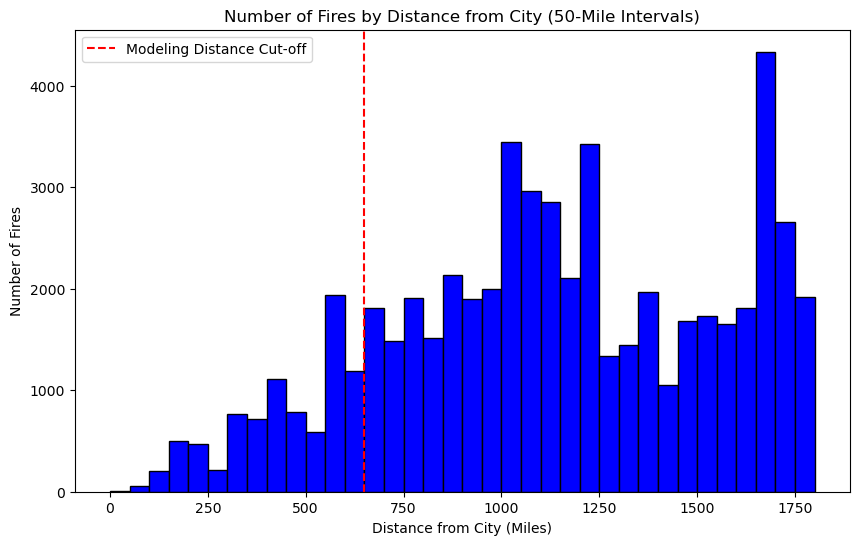

'../images/fires_distance_histogram.png'

<Figure size 640x480 with 0 Axes>

In [9]:

#filter fires within 1800 miles from the city
fires_within_distance = fire_db[fire_db['dist_from_city'] <= 1800]

#defining distance bins (50-mile intervals up to 1800 miles)
distance_bins = list(range(0, 1850, 50))  # [0, 50, 100, ..., 1800]

#histogram of fires by distance bins
plt.figure(figsize=(10, 6))
plt.hist(fires_within_distance['dist_from_city'], bins=distance_bins, color='blue', edgecolor='black')
plt.axvline(650, color='red', linestyle='--', label='Modeling Distance Cut-off')  # Show cut-off line

#histogram labels
plt.title('Number of Fires by Distance from City (50-Mile Intervals)')
plt.xlabel('Distance from City (Miles)')
plt.ylabel('Number of Fires')
plt.legend()
plt.show()

file_path = "../images/fires_distance_histogram.png"
plt.savefig(file_path, format='png')
file_path


### Explanation:

This code block sets a distance cut-off, filters the fire data accordingly, calculates the total acres burned per year within this distance, and visualizes the trend over time.

1. **Define Distance Cut-Off**:
   - `distance_cutoff = 650`: Sets a distance threshold (e.g., 650 miles) for filtering the data, relevant for modeling purposes.

2. **Filter Fires Based on Cut-Off**:
   - `fires_within_cutoff = fire_db[fire_db['dist_from_city'] <= distance_cutoff]`: Filters the `fire_db` DataFrame to include only fires within the specified cut-off distance from the city.

3. **Calculate Total Acres Burned per Year**:
   - `total_acres_burned_per_year = fires_within_cutoff.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()`: Groups the data by year and calculates the total acres burned each year within the specified distance, storing the results in a new DataFrame.

4. **Plot Time Series of Total Acres Burned per Year**:
   - `plt.plot(...)`: Plots a time series showing the trend of total acres burned per year within the specified distance.
   - The plot includes year as the x-axis and total acres burned as the y-axis.

5. **Label the Plot**:
   - `plt.title`, `plt.xlabel`, `plt.ylabel`: Provides titles and axis labels to clarify the data being visualized.

6. **Display the Plot**:
   - `plt.grid()`: Adds a grid for better readability.
   - `plt.show()`: Displays the plot.

7. **Save the Plot**:
   - `file_path = "../images/total_acres_burned.jpg"` and `plt.savefig(file_path, format='jpg')`: Specifies a file path and saves the plot as a `.jpg` file for documentation or reporting.


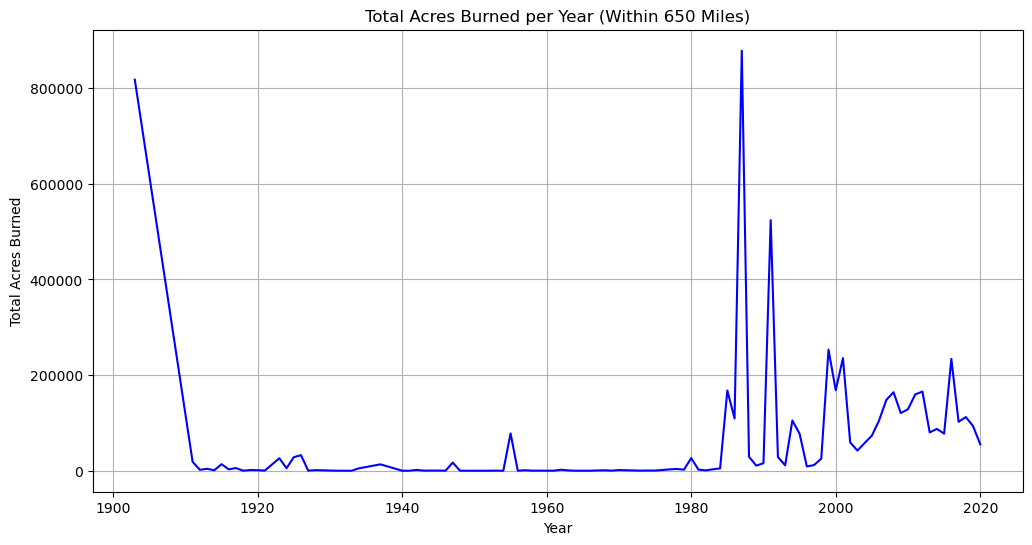

'../images/total_acres_burned.png'

<Figure size 640x480 with 0 Axes>

In [149]:
#defining the distance cut-off for modeling work, e.g., 500 miles
distance_cutoff = 650
fires_within_cutoff = fire_db[fire_db['dist_from_city'] <= distance_cutoff]

#grouping by year and calculate total acres burned
total_acres_burned_per_year = fires_within_cutoff.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

#plotting the time series for total acres burned per year
plt.figure(figsize=(12, 6))
plt.plot(total_acres_burned_per_year['Fire_Year'], total_acres_burned_per_year['GIS_Acres'], color='blue', marker='')

#time series plot labels
plt.title(f'Total Acres Burned per Year (Within {distance_cutoff} Miles)')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.grid()
plt.show()

file_path = "../images/total_acres_burned.png"
plt.savefig(file_path, format='png')
file_path


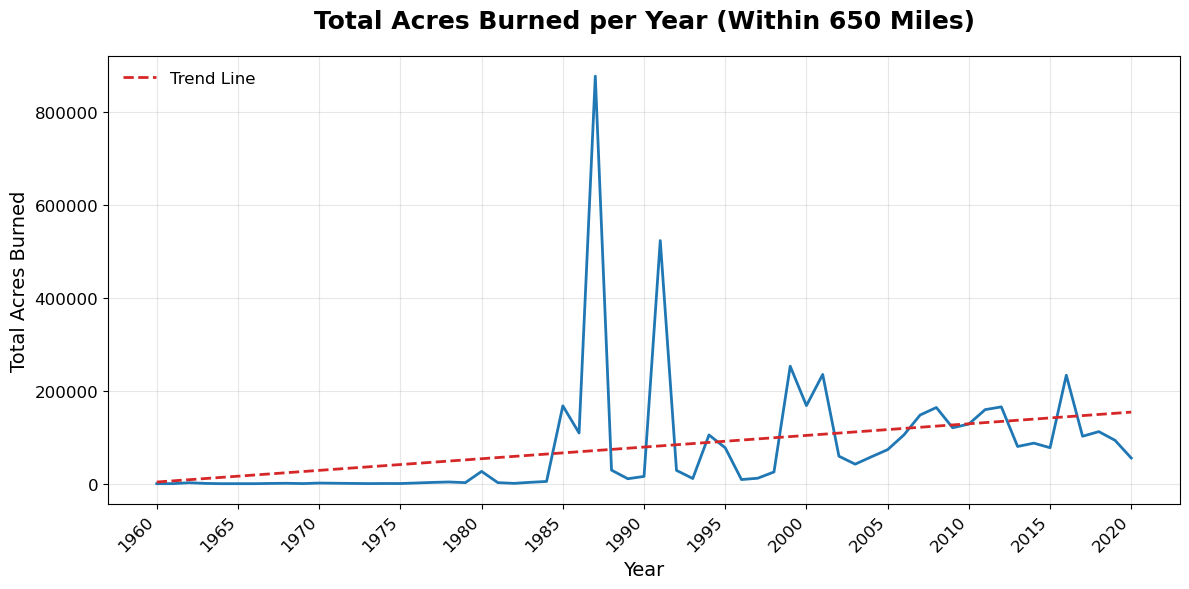

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

#filter data from 1960 onwards
fires_within_cutoff = fire_db[fire_db['Fire_Year'] >= 1960]
fires_within_cutoff = fires_within_cutoff[fires_within_cutoff['dist_from_city'] <= 650]

#grouping by year and calculating total acres burned
total_acres_burned_per_year = fires_within_cutoff.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

#convert 'Fire_Year' to datetime
total_acres_burned_per_year['Fire_Year'] = pd.to_datetime(total_acres_burned_per_year['Fire_Year'], format='%Y')

#create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

#plot the time series
ax.plot(total_acres_burned_per_year['Fire_Year'], total_acres_burned_per_year['GIS_Acres'], color='#1f77b4', linewidth=2)

#customize the plot
ax.set_title('Total Acres Burned per Year (Within 650 Miles)', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Acres Burned', fontsize=14)
ax.grid(True, alpha=0.3)

#format the x-axis ticks and labels
years = mdates.YearLocator(5)  # Tick every 5 years
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

#adding a trend line
z = np.polyfit(mdates.date2num(total_acres_burned_per_year['Fire_Year']), total_acres_burned_per_year['GIS_Acres'], 1)
p = np.poly1d(z)
ax.plot(total_acres_burned_per_year['Fire_Year'], p(mdates.date2num(total_acres_burned_per_year['Fire_Year'])),
        color='#d62728', linestyle='--', linewidth=2, label='Trend Line')
ax.legend(loc='upper left', fontsize=12, frameon=False)

#adjusting the layout
plt.tight_layout()
plt.show()

### Explanation:

This code block filters the `fire_db` dataset to include only fires that occurred within 650 miles from a specified city and within a specified time range (from 1961 to 2021).

1. **Filter by Distance**:
   - `(fire_db['dist_from_city'] <= 650)`: Filters the dataset to include only records where the distance from the city is 650 miles or less.

2. **Filter by Year Range**:
   - `(fire_db['Fire_Year'] >= 1961) & (fire_db['Fire_Year'] <= 2021)`: Restricts the dataset to fires that occurred between the years 1961 and 2021, inclusive.

3. **Create Filtered Dataset**:
   - `fire_db_milesfiltered`: Stores the filtered dataset as a new DataFrame, containing only the records that meet both the distance and year criteria.

4. **Preview Filtered Data**:
   - `fire_db_milesfiltered.head()`: Displays the first few rows of the filtered dataset, allowing for a quick inspection of the data subset.


In [11]:
#filtering fires within 650 miles from the city

fire_db_milesfiltered = fire_db[
    (fire_db['dist_from_city'] <= 650) &
    (fire_db['Fire_Year'] >= 1961) &
    (fire_db['Fire_Year'] <= 2021)
]
fire_db_milesfiltered.head()



,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Source_Datasets,Listed_Fire_Types,Listed_Fire_Names,...,Prescribed_Burn_Notice,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Exclude_From_Summary_Rasters,Shape_Length,Shape_Area,geometry,dist_from_city
13778,13779,Wildfire,1961,1,"1 (1), 3 (1)",28.693900,11.612009,Comb_National_NIFC_Interagency_Fire_Perimeter_...,Wildfire (2),W_C_H_4_3_W1_61 (2),...,Prescribed fire data in this dataset represent...,None,None,0.648984,NaN,No,1499.483528,1.161201e+05,"MULTIPOLYGON (((-83.71589 35.67573, -83.71587 ...",649.476635
14107,14108,Wildfire,1962,1,"1 (1), 3 (2)",82.182512,33.258083,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (1)",HICKORY (3),...,Prescribed fire data in this dataset represent...,None,None,0.456557,NaN,No,3025.561092,3.325808e+05,"MULTIPOLYGON (((-77.36346 38.57892, -77.36254 ...",314.657406
14383,14384,Wildfire,1963,1,"1 (1), 3 (2)",259.504473,105.017734,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (1)",MARTIN (3),...,Prescribed fire data in this dataset represent...,None,None,0.594017,NaN,No,4713.428799,1.050177e+06,"MULTIPOLYGON (((-77.39997 38.6319, -77.39815 3...",311.295756
14453,14454,Wildfire,1963,1,"1 (1), 3 (2)",30.743401,12.441413,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (1)",COLORED (3),...,Prescribed fire data in this dataset represent...,None,None,0.665455,NaN,No,1532.781864,1.244141e+05,"MULTIPOLYGON (((-77.33755 38.5905, -77.33762 3...",313.356107
14467,14468,Wildfire,1963,1,"1 (2), 3 (4)",18.306501,7.408378,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (4), Likely Wildfire (2)","RILEY (3), BEACH (3)",...,Prescribed fire data in this dataset represent...,None,None,0.377251,NaN,No,1570.910243,7.408378e+04,"MULTIPOLYGON (((-77.0415 38.97467, -77.04147 3...",284.414792


In [154]:
#Keeping data saved as extract
fire_db_milesfiltered.to_csv("../data/derived/fire_db_milesfiltered.csv", index=False)

### Explanation:

This code block calculates a "smoke estimate" based on fire data, incorporating fire size, distance, and type, and then aggregates this estimate by year.

1. **Assign Weights for Fire Types**:
   - `fire_type_weights`: Defines weights for each fire type, where `Wildfire` is the baseline with a weight of 1.0. Other fire types have lower weights, reducing their impact in the smoke estimate calculation.

2. **Calculate Smoke Estimate**:
   - `fire_db_milesfiltered['Smoke_Estimate']`: Creates a new column in the DataFrame to store the smoke estimate for each fire.
   - `apply(lambda x: ...)`: Applies a custom formula to each row, calculating the smoke estimate as follows:
     - `(x['GIS_Acres'] / (x['dist_from_city'] ** 2 if x['dist_from_city'] > 0 else 1))`: Divides the fire's burned area (`GIS_Acres`) by the square of its distance from the city. This distance-based scaling reduces the smoke estimate for fires farther away.
     - `* fire_type_weights.get(x['Assigned_Fire_Type'], 0.5)`: Multiplies by the weight associated with the fire type, defaulting to 0.5 if the fire type is not in the `fire_type_weights` dictionary.

#### Intuition Behind the Formula

The formula for calculating the smoke estimate is designed to capture the following key factors:

1. **Fire Size (GIS_Acres)**:  
   The larger the area burned by a fire, the greater the potential smoke generated. This is a direct contributor to the smoke estimate.

2. **Distance from the City (dist_from_city)**:  
   Smoke dispersion diminishes with distance. By dividing the burned area by the square of the distance, the formula reduces the smoke impact for fires farther away, simulating how smoke becomes less concentrated as it travels.

3. **Fire Type Weight (fire_type_weights)**:  
   Different types of fires produce varying amounts of smoke. For instance:
   - **Wildfires** are assigned a baseline weight of 1.0, as they tend to produce significant smoke.
   - Other fire types are assigned lower weights (e.g., prescribed burns) to reflect their comparatively smaller smoke emissions.
   - A default weight of 0.5 ensures minimal contribution for unclassified fire types.

##### Use of Full-Year AQI Data
The analysis uses AQI data for the entire year to ensure alignment with the smoke estimate calculations, which account for fires throughout the year. While the fire season (May to October) is a critical period, smoke from fires often impacts air quality beyond these months due to:
- **Lingering Effects**: Smoke from large-scale fires can remain in the atmosphere and affect AQI beyond the active fire months.
- **Secondary Events**: Controlled burns or re-ignitions occurring outside the fire season can contribute to air quality degradation.

This broader temporal scope provides a comprehensive view of the relationship between smoke estimates and AQI trends, capturing the full impact of fire-related emissions.

##### Use of Averages for AQI
Averages are used as a comparative metric for AQI because:
1. **Trend Analysis**: Yearly averages smooth out daily fluctuations and provide a clearer representation of long-term air quality trends.
2. **Consistency with Smoke Estimates**: Smoke estimates are aggregated annually; using yearly AQI averages ensures comparability.
3. **Focus on General Impact**: Averaging helps identify broader relationships between smoke estimates and air quality without being overly influenced by short-term anomalies.

Future analyses could incorporate additional metrics, such as percentiles or high-pollution days, to further explore nuanced patterns between smoke exposure and AQI changes.










### Purpose of the Formula
The formula balances these factors to provide a realistic estimate of the smoke impact of each fire, prioritizing proximity, fire size, and fire type. By aggregating these estimates yearly, the code provides a trendline for analyzing the smoke contribution from fires over time.

3. **Aggregate Smoke Estimate by Year**:
   - `yearly_smoke_estimate = fire_db_milesfiltered.groupby('Fire_Year')['Smoke_Estimate'].sum().reset_index()`: Groups the data by year and calculates the total smoke estimate for each year by summing individual smoke estimates.

4. **Display Results**:
   - `print(yearly_smoke_estimate)`: Outputs the yearly smoke estimate, allowing for a yearly comparison of smoke impact based on fires.


In [155]:
#determiningg smoke estimator

# Simplified weights for fire types to be used as a minor multiplier
fire_type_weights = {
    'Wildfire': 1.0,
    'Unknown - Likely Wildfire': 0.95,
    'Likely Wildfire': 0.9,
    'Prescribed Fire': 0.75,
    'Unknown - Likely Prescribed Fire': 0.7,
    'Other': 0.5  # Default for any other fire type
}

# Define an improved but simpler smoke estimate formula
fire_db_milesfiltered['Smoke_Estimate'] = fire_db_milesfiltered.apply(
    lambda x: (
        (x['GIS_Acres'] / (x['dist_from_city'] ** 2 if x['dist_from_city'] > 0 else 1)) 
        * fire_type_weights.get(x['Assigned_Fire_Type'], 0.5)
    ),
    axis=1
)

# Cumulative yearly smoke estimate
yearly_smoke_estimate = fire_db_milesfiltered.groupby('Fire_Year')['Smoke_Estimate'].sum().reset_index()
yearly_smoke_estimate.to_csv('../data/derived/yearly_smoke_estimate.csv')
# Display the results
print(yearly_smoke_estimate)



    Fire_Year  Smoke_Estimate
0        1961        0.000350
1        1962        0.006384
2        1963        0.004055
3        1964        0.000124
4        1965        0.000357
5        1966        0.000098
6        1967        0.001728
7        1968        0.002625
8        1969        0.001140
9        1970        0.004545
10       1971        0.006195
11       1973        0.000970
12       1974        0.001778
13       1975        0.001131
14       1976        0.005059
15       1977        0.008547
16       1978        0.022135
17       1979        0.008863
18       1980        0.138377
19       1981        0.010086
20       1982        0.003510
21       1983        0.010008
22       1984        0.035103
23       1985        1.454755
24       1986        0.394783
25       1987        3.359343
26       1988        0.164801
27       1989        0.113283
28       1990        0.122518
29       1991        2.384063
30       1992        0.390349
31       1993        0.065048
32       1

/opt/homebrew/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### Explanation:

This code initializes API registration and handles the signup process with the EPA’s Air Quality System (AQS) API, defining endpoint URLs and templates for various API actions. It also includes a function for requesting API signup.

1. **Define API Endpoint URLs and Actions**:
   - `API_REQUEST_URL` and specific actions like `API_ACTION_SIGNUP`, `API_ACTION_LIST_CLASSES`, etc., represent the base URL and different API endpoints for various functionalities (e.g., listing classes, parameters, and sites, fetching monitor data, and daily summaries). Parameters in each URL are placeholders to be replaced when making requests.

2. **Set API Throttle Control**:
   - `API_LATENCY_ASSUMED` and `API_THROTTLE_WAIT`: Manage rate-limiting by setting a throttle wait time, calculated to avoid exceeding request limits.

3. **API Request Template**:
   - `AQS_REQUEST_TEMPLATE`: A dictionary template for passing required fields (like `email`, `state`, `county`, `begin_date`, etc.) to the API, streamlining request customization.

4. **Signup Request Function**:
   - `request_signup(...)`: A function for API signup using the specified email. This function:
     - Checks if an email is provided and validates its format.
     - Builds the request URL with provided email and `API_REQUEST_URL` and then executes the signup request.
     - Waits if needed (`API_THROTTLE_WAIT`) and handles potential exceptions during the request.
     - Returns the JSON response of the signup request or `None` if there is an exception.

5. **Test Signup Request**:
   - `USERNAME` and `response`: Defines an email address and invokes `request_signup()` to test the signup process. The JSON response is printed in an indented format for readability.


In [36]:
#api registration


API_REQUEST_URL = 'https://aqs.epa.gov/data/api'
API_ACTION_SIGNUP = '/signup?email={email}'

API_ACTION_LIST_CLASSES = '/list/classes?email={email}&key={key}'
API_ACTION_LIST_PARAMS = '/list/parametersByClass?email={email}&key={key}&pc={pclass}'
API_ACTION_LIST_SITES = '/list/sitesByCounty?email={email}&key={key}&state={state}&county={county}'

API_ACTION_MONITORS_COUNTY = '/monitors/byCounty?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&state={state}&county={county}'
API_ACTION_MONITORS_BOX = '/monitors/byBox?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&minlat={minlat}&maxlat={maxlat}&minlon={minlon}&maxlon={maxlon}'

API_ACTION_DAILY_SUMMARY_COUNTY = '/dailyData/byCounty?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&state={state}&county={county}'
API_ACTION_DAILY_SUMMARY_BOX = '/dailyData/byBox?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&minlat={minlat}&maxlat={maxlat}&minlon={minlon}&maxlon={maxlon}'


API_LATENCY_ASSUMED = 0.002
API_THROTTLE_WAIT = (1.0/100.0)-API_LATENCY_ASSUMED

AQS_REQUEST_TEMPLATE = {
    "email":      "",     
    "key":        "",      
    "state":      "",
    "county":     "",
    "begin_date": "",
    "end_date":   "",
    "minlat":    0.0,
    "maxlat":    0.0,
    "minlon":    0.0,
    "maxlon":    0.0,
    "param":     "",
    "pclass":    ""
}


def request_signup(email_address = None,
                   endpoint_url = API_REQUEST_URL, 
                   endpoint_action = API_ACTION_SIGNUP, 
                   request_template = AQS_REQUEST_TEMPLATE,
                   headers = None):
    
    if email_address:
        request_template['email'] = email_address        
    
    if not request_template['email']: 
        raise Exception("Must supply an email address to call 'request_signup()'")

    if '@' not in request_template['email']: 
        raise Exception(f"Must supply an email address to call 'request_signup()'. The string '{request_template['email']}' does not look like an email address.")

    request_url = endpoint_url+endpoint_action.format(**request_template)
        
    #making the request
    try:
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response

print("Requesting SIGNUP ...")
USERNAME = "tbaner@uw.edu"
response = request_signup(USERNAME)
print(json.dumps(response,indent=4))


Requesting SIGNUP ...
{
    "Header": [
        {
            "status": "Success",
            "request_time": "2024-10-30T02:59:38-04:00",
            "url": "https://aqs.epa.gov/data/api/signup?email=tbaner@uw.edu"
        }
    ],
    "Data": [
        "You should receive a registration confirmation email with a link for confirming your email shortly."
    ]
}


## AQI data -> ITERATION 1 
#### (not used finally, as the parameters are not evailable for all the years in study)


### Iteration 1: fetching AQI data without using bounding box constraints.
### Explanation:

This code retrieves Air Quality Index (AQI) data from the EPA API based on parameters specific to Onondaga County, Syracuse, NY, using county-based filtering. Note: 

1. **Constants for API Configuration**:
   - `API_REQUEST_URL` and `API_ACTION_DAILY_SUMMARY_COUNTY`: Define the base API URL and endpoint for requesting daily summary AQI data by county.
   - `AQI_DATA_FILE`: Specifies the path to store fetched AQI data in CSV format.

2. **AQI Parameters for Pollutants**:
   - `AQI_PARAMS_GASEOUS` and `AQI_PARAMS_PARTICULATES`: Lists the parameter codes for various pollutants. `AQI_PARAMS_GASEOUS` includes gases like CO, SO₂, NO₂, and O₃, while `AQI_PARAMS_PARTICULATES` includes particulate matter (PM10, PM2.5).

3. **API Credentials and County Identifiers**:
   - `USERNAME` and `APIKEY`: Store API credentials.
   - `STATE_FIPS` and `COUNTY_FIPS`: Provide FIPS codes for New York State and Onondaga County, respectively.

4. **Function to Request Daily Summary Data**:
   - `request_daily_summary_county(...)`: Requests daily AQI data for specified parameters within the county. It generates the request URL with date parameters based on the year and retrieves JSON data from the API.

5. **Function to Fetch and Store AQI Data**:
   - `fetch_and_store_aqi_data(...)`: Loops through the specified date range (by year), fetching AQI data for each year. It:
     - Appends data to the CSV file if it already exists; otherwise, it creates a new file.
     - Converts JSON data to a DataFrame and writes it to CSV.
     - Checks the API response status and handles potential errors.

6. **Fetch Data if File Does Not Exist**:
   - Checks for `AQI_DATA_FILE`'s existence. If it does not exist, initiates data fetching for the years 1961–2021; otherwise, skips the data retrieval process.

**Note**: This approach uses county filtering for AQI data and does not apply geographic bounding boxes at this iteration.


In [38]:


#CONSTANTS for API
API_REQUEST_URL = "https://aqs.epa.gov/data/api"
API_ACTION_DAILY_SUMMARY_COUNTY = "/dailyData/byCounty?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&state={state}&county={county}"
#file to store the AQI fetched data
AQI_DATA_FILE = "../data/derived/raw_aqi_data.csv"

#AQI parameters for gaseous and particulate pollutants
#CO, SO2, NO2, O3
AQI_PARAMS_GASEOUS = "42101,42401,42602,44201"
# PM10, PM2.5
AQI_PARAMS_PARTICULATES = "81102,88101,88502"

#api creds
USERNAME = "tbaner@uw.edu"
APIKEY = "khakicat63"

#FIPS codes for Syracuse New York - Onondaga County
STATE_FIPS = "36"
COUNTY_FIPS = "067"

#function to request daily summary data for Onondaga County
def request_daily_summary_county(email, key, state, county, param, year):
    begin_date = f"{year}0101"
    end_date = f"{year}1231"
    request_url = API_REQUEST_URL + API_ACTION_DAILY_SUMMARY_COUNTY.format(
        email=email, key=key, param=param, begin_date=begin_date, end_date=end_date, state=state, county=county
    )
    response = requests.get(request_url)
    time.sleep(0.1)
    return response.json()

#function to fetch and store AQI data in CSV format
def fetch_and_store_aqi_data(email, key, state, county, param, start_year, end_year):
    if os.path.exists(AQI_DATA_FILE):
        write_mode = 'a'
        header = False
    else:
        write_mode = 'w'
        header = True

    for year in range(start_year, end_year + 1):
        aqi_data = request_daily_summary_county(email, key, state, county, param, year)
        if aqi_data["Header"][0]["status"] == "Success":
            df = pd.DataFrame(aqi_data["Data"])
            print(f"Fetched data for {year}: {len(df)} records")
            df.to_csv(AQI_DATA_FILE, mode=write_mode, header=header, index=False)
            write_mode = 'a'
            header = False
        else:
            print(f"Error fetching AQI data for year {year}: {aqi_data}")

if not os.path.exists(AQI_DATA_FILE):
    print("Fetching AQI data from EPA API...")
    fetch_and_store_aqi_data(USERNAME, APIKEY, STATE_FIPS, COUNTY_FIPS, f"{AQI_PARAMS_GASEOUS},{AQI_PARAMS_PARTICULATES}", 1961, 2021)
else:
    print(f"AQI data already exists in {AQI_DATA_FILE}.")


Fetching AQI data from EPA API...
Error fetching AQI data for year 1961: {'Header': [{'status': 'No data matched your selection', 'request_time': '2024-10-30T03:44:29-04:00', 'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=tbaner@uw.edu&key=khakicat63&param=42101,42401,42602,44201,81102,88101,88502&bdate=19610101&edate=19611231&state=36&county=067', 'rows': 0}], 'Data': []}
Error fetching AQI data for year 1962: {'Header': [{'status': 'No data matched your selection', 'request_time': '2024-10-30T03:45:44-04:00', 'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=tbaner@uw.edu&key=khakicat63&param=42101,42401,42602,44201,81102,88101,88502&bdate=19620101&edate=19621231&state=36&county=067', 'rows': 0}], 'Data': []}
Error fetching AQI data for year 1963: {'Header': [{'status': 'No data matched your selection', 'request_time': '2024-10-30T03:47:00-04:00', 'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=tbaner@uw.edu&key=khakicat63&param=42101,42401,42

### ..Iteration 1 continued:
### Explanation:

This code reads the previously fetched AQI data from a CSV file into a pandas DataFrame for analysis.

1. **Load AQI Data**:
   - `aqi_db = pd.read_csv("../data/derived/raw_aqi_data.csv")`: Reads AQI data from the specified CSV file path and loads it into the `aqi_db` DataFrame.

2. **Preview Data**:
   - `aqi_db.head()`: Displays the first few rows of the AQI data, allowing a quick inspection of the data structure and contents.

This dataset can now be used for further analysis, filtering, or visualization.


In [49]:
aqi_db = pd.read_csv("../data/derived/raw_aqi_data.csv")
aqi_db.head()

/var/folders/pc/g7llzl3517q8v_lqg7_6_5_40000gn/T/ipykernel_74236/1743662514.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  aqi_db = pd.read_csv("../data/derived/raw_aqi_data.csv")


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,36,67,4001,42401,1,43.050457,-76.133416,WGS84,Sulfur dioxide,7,...,91.0,GAS-BUBBLER - PARAROSANILINE-SULFAMIC ACID,NaN,WATER WORKS BLDG.; 101 N.BEECH STREET,New York,Onondaga,Syracuse,45060,"Syracuse, NY",2013-06-11
1,36,67,4001,42401,1,43.050457,-76.133416,WGS84,Sulfur dioxide,7,...,91.0,GAS-BUBBLER - PARAROSANILINE-SULFAMIC ACID,NaN,WATER WORKS BLDG.; 101 N.BEECH STREET,New York,Onondaga,Syracuse,45060,"Syracuse, NY",2013-06-11
2,36,67,4001,42401,1,43.050457,-76.133416,WGS84,Sulfur dioxide,7,...,91.0,GAS-BUBBLER - PARAROSANILINE-SULFAMIC ACID,NaN,WATER WORKS BLDG.; 101 N.BEECH STREET,New York,Onondaga,Syracuse,45060,"Syracuse, NY",2013-06-11
3,36,67,4001,42401,1,43.050457,-76.133416,WGS84,Sulfur dioxide,7,...,91.0,GAS-BUBBLER - PARAROSANILINE-SULFAMIC ACID,NaN,WATER WORKS BLDG.; 101 N.BEECH STREET,New York,Onondaga,Syracuse,45060,"Syracuse, NY",2013-06-11
4,36,67,4001,42401,1,43.050457,-76.133416,WGS84,Sulfur dioxide,7,...,91.0,GAS-BUBBLER - PARAROSANILINE-SULFAMIC ACID,NaN,WATER WORKS BLDG.; 101 N.BEECH STREET,New York,Onondaga,Syracuse,45060,"Syracuse, NY",2013-06-11


### ..continued Iteration 1
### Explanation:

This code processes AQI data to calculate the annual average for each pollutant, reorganizing the data for easy interpretation and saving it to a CSV file.

1. **Convert Date to Datetime and Extract Year**:
   - `aqi_db['date_local'] = pd.to_datetime(aqi_db['date_local'])`: Converts the `date_local` column to a datetime format.
   - `aqi_db['year'] = aqi_db['date_local'].dt.year`: Extracts the year from each date, creating a `year` column for yearly grouping.

2. **Filter Columns**:
   - `data_filtered = aqi_db[['year', 'parameter', 'arithmetic_mean']]`: Selects only the necessary columns (`year`, `parameter`, and `arithmetic_mean`) to simplify the data for averaging.

3. **Calculate Annual Average per Pollutant**:
   - `avg_data = data_filtered.groupby(['year', 'parameter']).mean().reset_index()`: Groups data by `year` and `parameter`, calculating the mean for each pollutant's arithmetic mean in each year.

4. **Reshape Data with Pivot**:
   - `avg_data.pivot(index='year', columns='parameter', values='arithmetic_mean')`: Converts the `parameter` values into separate columns, each representing a pollutant, with average values as the entries.

5. **Rename Columns**:
   - `avg_data_pivot.columns = ["avg_" + col.replace(" ", "_").upper() for col in avg_data_pivot.columns]`: Renames columns for clarity, adding `avg_` as a prefix and replacing spaces with underscores.

6. **Save Processed Data**:
   - `avg_data_pivot.to_csv("../data/derived/average_aqi_data_by_year.csv", index=False)`: Saves the processed and reshaped DataFrame to a CSV file, ready for further analysis or reporting.

This results in a dataset with annual averages of AQI for each pollutant, facilitating trend analysis.


In [50]:
#converting 'date_local' to datetime to extract the year
aqi_db['date_local'] = pd.to_datetime(aqi_db['date_local'])
aqi_db['year'] = aqi_db['date_local'].dt.year

#filtering necessary columns for averaging
data_filtered = aqi_db[['year', 'parameter', 'arithmetic_mean']]

#calculating the average arithmetic mean for each year and pollutant parameter
avg_data = data_filtered.groupby(['year', 'parameter']).mean().reset_index()

#pivoting the data to have each pollutant as a separate column
avg_data_pivot = avg_data.pivot(index='year', columns='parameter', values='arithmetic_mean')

#renaming columns for easier interpretation (e.g., 'Carbon monoxide' to 'avg_CO')
avg_data_pivot.columns = ["avg_" + col.replace(" ", "_").upper() for col in avg_data_pivot.columns]

avg_data_pivot = avg_data_pivot.reset_index()
avg_data_pivot.head()

avg_data_pivot.to_csv("../data/derived/average_aqi_data_by_year.csv", index=False)


### ..continued Iteration 1

### Explanation:

This code calculates the number of missing values (NaNs) in each pollutant column for each year, helping to identify any gaps in the data.

1. **Check for NaNs and Group by Year**:
   - `avg_data_pivot.isna()`: Generates a DataFrame where each cell is `True` if the value is NaN and `False` otherwise.
   - `.groupby(avg_data_pivot['year']).sum()`: Groups the DataFrame by `year` and sums the `True` values for each year, effectively counting the NaNs in each column per year.

2. **Result**:
   - `nan_counts`: Stores the count of missing values in each pollutant column by year, providing insights into data completeness and identifying years with missing data for specific pollutants.


In [51]:
#calculate the number of NaNs per year for each pollutant parameter
nan_counts = avg_data_pivot.isna().groupby(avg_data_pivot['year']).sum()
print(nan_counts)


      year  avg_CARBON_MONOXIDE  avg_NITROGEN_DIOXIDE_(NO2)  avg_OZONE  \
year                                                                     
1968     0                    1                           1          1   
1969     0                    1                           1          1   
1970     0                    1                           1          1   
1971     0                    0                           0          0   
1972     0                    0                           0          0   
1973     0                    0                           0          0   
1974     0                    0                           0          0   
1975     0                    0                           0          0   
1976     0                    0                           0          0   
1977     0                    0                           0          0   
1978     0                    0                           0          0   
1979     0                    0       

a lot of the parameters are missing for several years so adding a geodesic bounding box


## AQI data -> ITERATION 2, 3, 4, 5 
#### Iterations have been updated in the same code block as it only involves changing the bounding box area
#### (not used finally, as the parameters are not evailable for all the years in study)


### Explanation:

This code block fetches AQI data from the EPA API based on a defined geographic bounding box around Syracuse, NY, and adjusts the bounding box size based on data availability during testing.

1. **API Constants**:
   - `API_REQUEST_URL` and `API_ACTION_DAILY_SUMMARY_BBOX`: Define the API’s base URL and the endpoint to request AQI data within a geographic bounding box.
   - `AQI_DATA_FILE`: Specifies the output CSV file path for storing AQI data.

2. **AQI Pollutant Parameters**:
   - `AQI_PARAMS_GASEOUS` and `AQI_PARAMS_PARTICULATES`: Include codes for gaseous pollutants (CO, SO₂, NO₂, O₃) and particulates (PM10, PM2.5).

3. **User Credentials and Location Coordinates**:
   - `USERNAME` and `APIKEY`: Store the API credentials.
   - `SYRACUSE_COORDINATES`: Coordinates for Syracuse, NY (latitude, longitude).

4. **Bounding Box Calculation**:
   - The `LAT_25MILES` and `LON_25MILES` constants approximate 25 miles in decimal degrees for latitude and longitude. The `bounding_latlon()` function calculates the bounding box coordinates based on a scale factor.
   - `min_lat, max_lat, min_lon, max_lon`: Set a bounding box of 50 miles around Syracuse, achieved by setting `scale=4`.

5. **Remove Existing AQI Data File**:
   - Checks if `AQI_DATA_FILE` exists and removes it to ensure fresh data is saved.

6. **API Request Function for Bounding Box**:
   - `request_daily_summary_bbox(...)`: Builds the request URL and fetches AQI data within the bounding box for a given year. It returns the API’s JSON response.

7. **Data Fetching and Storage**:
   - `fetch_and_store_aqi_data(...)`: Iterates over the specified date range, fetching data for each year and appending it to the CSV file.
   - Data is saved with headers on the first write, and headers are disabled for subsequent appends.

8. **Bounding Box Testing and Observations**:
#### Output files for each iteration and how each iteration did not provide data fullness or what is expected
   - Adjustments to the bounding box scale revealed the availability and coverage of specific pollutants:
     - **v2**: Bounding box of 50 miles only retrieved SO₂ data for 1968–1969.
     - **v3**: Bounding box of 50 miles provided no data for NO₂ and PM10 for 2016–2017.
     - **v4**: Bounding box increased to 100 miles for 2016–2017; all pollutant parameters were retrieved.
     - **v5**: Bounding box set to 100 miles for the full date range (1961–2021), capturing most but not all pollutant parameters across the period.

This iterative approach allowed for refinement of the bounding box size, ensuring complete data retrieval for AQI parameters over the selected years.




In [62]:


#CONSTANTS for API
API_REQUEST_URL = "https://aqs.epa.gov/data/api"
API_ACTION_DAILY_SUMMARY_BBOX = "/dailyData/byBox?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&minlat={min_lat}&maxlat={max_lat}&minlon={min_lon}&maxlon={max_lon}"
AQI_DATA_FILE = "../data/derived/raw_aqi_data_v5.csv"

#AQI parameters for gaseous and particulate pollutants
AQI_PARAMS_GASEOUS = "42101,42401,42602,44201"  # CO, SO2, NO2, O3
AQI_PARAMS_PARTICULATES = "81102,88101,88502"  # PM10, PM2.5

#credentials
USERNAME = "tbaner@uw.edu"
APIKEY = "khakicat63"

#Coordinates for Syracuse, NY
SYRACUSE_COORDINATES = {'latlon': (43.0481, -76.1474)}  # (latitude, longitude)

#Constants for latitude and longitude in miles (roughly)
LAT_25MILES = 25.0 * (1.0 / 69.0)    # Approx. 25 miles in decimal degrees latitude
LON_25MILES = 25.0 * (1.0 / 54.6)    # Approx. 25 miles in decimal degrees longitude

#Bounding box function using rough distance estimates
def bounding_latlon(place, scale=1.0):
    minlat = place['latlon'][0] - float(scale) * LAT_25MILES
    maxlat = place['latlon'][0] + float(scale) * LAT_25MILES
    minlon = place['latlon'][1] - float(scale) * LON_25MILES
    maxlon = place['latlon'][1] + float(scale) * LON_25MILES
    return minlat, maxlat, minlon, maxlon

#bounding box limits for a 50-mile range 
min_lat, max_lat, min_lon, max_lon = bounding_latlon(SYRACUSE_COORDINATES, scale=4)

if os.path.exists(AQI_DATA_FILE):
    os.remove(AQI_DATA_FILE)
    print(f"Existing file {AQI_DATA_FILE} removed.")

#Function to request daily summary data for a bounding box
def request_daily_summary_bbox(email, key, min_lat, max_lat, min_lon, max_lon, param, year):
    begin_date = f"{year}0101"
    end_date = f"{year}1231"
    request_url = API_REQUEST_URL + API_ACTION_DAILY_SUMMARY_BBOX.format(
        email=email, key=key, param=param, begin_date=begin_date, end_date=end_date, 
        min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon
    )
    response = requests.get(request_url)
    time.sleep(0.1)
    return response.json()

#Function to fetch and store AQI data in CSV format within the bounding box
def fetch_and_store_aqi_data(email, key, min_lat, max_lat, min_lon, max_lon, param, start_year, end_year):
    write_mode = 'w'  # Always start with write mode for a new file
    header = True

    for year in range(start_year, end_year + 1):
        aqi_data = request_daily_summary_bbox(email, key, min_lat, max_lat, min_lon, max_lon, param, year)
        if aqi_data["Header"][0]["status"] == "Success":
            df = pd.DataFrame(aqi_data["Data"])
            print(f"Fetched data for {year}: {len(df)} records within bounding box")
            df.to_csv(AQI_DATA_FILE, mode=write_mode, header=header, index=False)
            write_mode = 'a'
            header = False
        else:
            print(f"Error fetching AQI data for year {year}: {aqi_data}")

print("Fetching AQI data from EPA API...")
fetch_and_store_aqi_data(USERNAME, APIKEY, min_lat, max_lat, min_lon, max_lon, f"{AQI_PARAMS_GASEOUS},{AQI_PARAMS_PARTICULATES}", 1961, 2021)

#tests
#v2-> bounding box of 50 miles did not show any parameters other than SO2 for 1968-69
#v3->bounding box of 50 miles no data for NITROGEN_DIOXIDE_(NO2) and PM10_TOTAL_0-10UM_STP for 2016-17
#v4-> bounding box of 100 miles for 2016-17 --> gave all parametersd
#v5-> bounding box of 100 miles for 1961-2021 (full data fetch)


Fetching AQI data from EPA API...
Error fetching AQI data for year 1961: {'Header': [{'status': 'No data matched your selection', 'request_time': '2024-10-30T06:53:40-04:00', 'url': 'https://aqs.epa.gov/data/api/dailyData/byBox?email=tbaner@uw.edu&key=khakicat63&param=42101,42401,42602,44201,81102,88101,88502&bdate=19610101&edate=19611231&minlat=41.598824637681155&maxlat=44.49737536231884&minlon=-77.97890183150183&maxlon=-74.31589816849818', 'rows': 0}], 'Data': []}
Error fetching AQI data for year 1962: {'Header': [{'status': 'No data matched your selection', 'request_time': '2024-10-30T06:54:55-04:00', 'url': 'https://aqs.epa.gov/data/api/dailyData/byBox?email=tbaner@uw.edu&key=khakicat63&param=42101,42401,42602,44201,81102,88101,88502&bdate=19620101&edate=19621231&minlat=41.598824637681155&maxlat=44.49737536231884&minlon=-77.97890183150183&maxlon=-74.31589816849818', 'rows': 0}], 'Data': []}
Error fetching AQI data for year 1963: {'Header': [{'status': 'No data matched your selectio

## ..continued ITERATION 2, 3, 4, 5 

### Explanation:

This code processes the AQI data fetched using the updated bounding box (v5) around Syracuse, NY, and calculates yearly averages for each pollutant parameter. The final processed data is saved to a CSV file for analysis.

1. **Load and Preview Data**:
   - `aqi_db_v2 = pd.read_csv("../data/derived/raw_aqi_data_v5.csv")`: Loads the AQI data (v5) with the bounding box applied from the CSV file.
   - **Convert Date to Datetime and Extract Year**:
     - `aqi_db_v2['date_local'] = pd.to_datetime(aqi_db_v2['date_local'])`: Converts the `date_local` column to datetime format.
     - `aqi_db_v2['year'] = aqi_db_v2['date_local'].dt.year`: Extracts the year for grouping data by year.

2. **Filter Columns for Averaging**:
   - `data_filtered_v2 = aqi_db_v2[['year', 'parameter', 'arithmetic_mean']]`: Selects only `year`, `parameter`, and `arithmetic_mean` columns for averaging.

3. **Calculate Yearly Average per Pollutant**:
   - `avg_data_v2 = data_filtered_v2.groupby(['year', 'parameter']).mean().reset_index()`: Groups by year and pollutant, then calculates the mean for each pollutant in each year.

4. **Pivot Data for Readability**:
   - `avg_data_pivot_v2 = avg_data_v2.pivot(index='year', columns='parameter', values='arithmetic_mean')`: Creates columns for each pollutant, with yearly averages as values.

5. **Rename Columns for Clarity**:
   - `avg_data_pivot_v2.columns = ["avg_" + col.replace(" ", "_").upper() for col in avg_data_pivot_v2.columns]`: Renames pollutant columns for easier interpretation.

6. **Save Processed Data**:
   - `avg_data_pivot_v2.to_csv("../data/derived/average_aqi_data_by_year_v2.csv", index=False)`: Saves the processed data to a CSV file for further analysis.

7. **Observations**:
   - Data for PM2.5 is not available before 1999, and some years in the dataset lack NO₂ data, indicating gaps for specific pollutants across certain years.



In [63]:
#repeating this step for the bounding box applied data fetched v5 data

aqi_db_v2 = pd.read_csv("../data/derived/raw_aqi_data_v5.csv")

# aqi_db_v2.head()
#converting 'date_local' to datetime to extract the year
aqi_db_v2['date_local'] = pd.to_datetime(aqi_db_v2['date_local'])
aqi_db_v2['year'] = aqi_db_v2['date_local'].dt.year

#filtering necessary columns for averaging
data_filtered_v2 = aqi_db_v2[['year', 'parameter', 'arithmetic_mean']]

#calculating the average arithmetic mean for each year and pollutant parameter
avg_data_v2 = data_filtered_v2.groupby(['year', 'parameter']).mean().reset_index()

#pivoting the data to have each pollutant as a separate column
avg_data_pivot_v2 = avg_data_v2.pivot(index='year', columns='parameter', values='arithmetic_mean')

#renaming columns for easier interpretation (e.g., 'Carbon monoxide' to 'avg_CO')
avg_data_pivot_v2.columns = ["avg_" + col.replace(" ", "_").upper() for col in avg_data_pivot_v2.columns]

avg_data_pivot_v2 = avg_data_pivot_v2.reset_index()
# avg_data_pivot_v2.head()

avg_data_pivot_v2.to_csv("../data/derived/average_aqi_data_by_year_v2.csv", index=False)

#data for PM 2.5 not there before 1999 and NO2 not there for some years in the middle 


## AQI data -> ITERATION 6 (FINAL ITERATION)

### Explanation:

This code fetches AQI data using a bounding box around Syracuse, NY, with an initial 200-mile range but notes a high data volume resulting in timeouts. As a result, the bounding box is reduced to 150 miles to manage data size and processing.

1. **API Constants**:
   - `API_REQUEST_URL` and `API_ACTION_DAILY_SUMMARY_BBOX`: Define the base API URL and endpoint to request AQI data within a geographic bounding box.
   - `AQI_DATA_FILE`: Specifies the file path for storing the AQI data retrieved in CSV format.

2. **AQI Pollutant Parameters**:
   - `AQI_PARAMS_GASEOUS` and `AQI_PARAMS_PARTICULATES`: Define codes for gaseous pollutants (CO, SO₂, NO₂, O₃) and particulate matter (PM10, PM2.5).

3. **Credentials and Coordinates**:
   - `USERNAME` and `APIKEY`: API credentials for authentication.
   - `SYRACUSE_COORDINATES`: Latitude and longitude for Syracuse, NY.

4. **Bounding Box Calculation**:
   - Constants `LAT_25MILES` and `LON_25MILES` approximate 25 miles in decimal degrees for latitude and longitude. The `bounding_latlon()` function calculates the bounding box limits by scaling these values.
   - `min_lat, max_lat, min_lon, max_lon = bounding_latlon(SYRACUSE_COORDINATES, scale=6)`: Initially sets a 200-mile bounding box. However, due to timeouts from retrieving nearly 300,000 rows per year, a 150-mile range is tested for efficiency.

5. **Remove Existing Data File**:
   - If `AQI_DATA_FILE` exists, it is deleted to ensure new data is saved.

6. **API Request Function for Bounding Box**:
   - `request_daily_summary_bbox(...)`: Constructs the request URL and retrieves AQI data for a given year within the specified bounding box.

7. **Data Fetching and Storage**:
   - `fetch_and_store_aqi_data(...)`: Iterates over the specified date range, fetching and saving data for each year. Data is written to the CSV file in write mode initially and appending mode subsequently.

8. **Adjusting Bounding Box**:
   - **Observation**: The initial bounding box of 200 miles resulted in timeouts due to large data volume. Switching to a 150-mile bounding box helps balance data coverage with manageable data size.

The final version refines the bounding box size to prevent timeouts while ensuring comprehensive data retrieval.


In [76]:
#CONSTANTS for API
API_REQUEST_URL = "https://aqs.epa.gov/data/api"
API_ACTION_DAILY_SUMMARY_BBOX = "/dailyData/byBox?email={email}&key={key}&param={param}&bdate={begin_date}&edate={end_date}&minlat={min_lat}&maxlat={max_lat}&minlon={min_lon}&maxlon={max_lon}"
AQI_DATA_FILE = "../data/derived/raw_aqi_data_v7.csv"

#AQI parameters for gaseous and particulate pollutants
AQI_PARAMS_GASEOUS = "42101,42401,42602,44201"  # CO, SO2, NO2, O3
AQI_PARAMS_PARTICULATES = "81102,88101,88502"  # PM10, PM2.5

#credentials
USERNAME = "tbaner@uw.edu"
APIKEY = "khakicat63"

#Coordinates for Syracuse, NY
SYRACUSE_COORDINATES = {'latlon': (43.0481, -76.1474)}  # (latitude, longitude)

#Constants for latitude and longitude in miles (roughly)
LAT_25MILES = 25.0 * (1.0 / 69.0)    # Approx. 25 miles in decimal degrees latitude
LON_25MILES = 25.0 * (1.0 / 54.6)    # Approx. 25 miles in decimal degrees longitude

#Bounding box function using rough distance estimates
def bounding_latlon(place, scale=1.0):
    minlat = place['latlon'][0] - float(scale) * LAT_25MILES
    maxlat = place['latlon'][0] + float(scale) * LAT_25MILES
    minlon = place['latlon'][1] - float(scale) * LON_25MILES
    maxlon = place['latlon'][1] + float(scale) * LON_25MILES
    return minlat, maxlat, minlon, maxlon

#bounding box limits for a 200-mile range 
min_lat, max_lat, min_lon, max_lon = bounding_latlon(SYRACUSE_COORDINATES, scale=6)

if os.path.exists(AQI_DATA_FILE):
    os.remove(AQI_DATA_FILE)
    print(f"Existing file {AQI_DATA_FILE} removed.")

#Function to request daily summary data for a bounding box
def request_daily_summary_bbox(email, key, min_lat, max_lat, min_lon, max_lon, param, year):
    begin_date = f"{year}0101"
    end_date = f"{year}1231"
    request_url = API_REQUEST_URL + API_ACTION_DAILY_SUMMARY_BBOX.format(
        email=email, key=key, param=param, begin_date=begin_date, end_date=end_date, 
        min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon
    )
    response = requests.get(request_url)
    time.sleep(0.1)
    return response.json()

#Function to fetch and store AQI data in CSV format within the bounding box
def fetch_and_store_aqi_data(email, key, min_lat, max_lat, min_lon, max_lon, param, start_year, end_year):
    write_mode = 'w'  # Always start with write mode for a new file
    header = True

    for year in range(start_year, end_year + 1):
        aqi_data = request_daily_summary_bbox(email, key, min_lat, max_lat, min_lon, max_lon, param, year)
        if aqi_data["Header"][0]["status"] == "Success":
            df = pd.DataFrame(aqi_data["Data"])
            print(f"Fetched data for {year}: {len(df)} records within bounding box")
            df.to_csv(AQI_DATA_FILE, mode=write_mode, header=header, index=False)
            write_mode = 'a'
            header = False
        else:
            print(f"Error fetching AQI data for year {year}: {aqi_data}")

print("Fetching AQI data from EPA API...")
fetch_and_store_aqi_data(USERNAME, APIKEY, min_lat, max_lat, min_lon, max_lon, f"{AQI_PARAMS_GASEOUS},{AQI_PARAMS_PARTICULATES}", 1961, 2021)



Existing file ../data/derived/raw_aqi_data_v7.csv removed.
Fetching AQI data from EPA API...
Error fetching AQI data for year 1961: {'Header': [{'status': 'No data matched your selection', 'request_time': '2024-10-30T12:23:35-04:00', 'url': 'https://aqs.epa.gov/data/api/dailyData/byBox?email=tbaner@uw.edu&key=khakicat63&param=42101,42401,42602,44201,81102,88101,88502&bdate=19610101&edate=19611231&minlat=40.87418695652174&maxlat=45.222013043478256&minlon=-78.89465274725275&maxlon=-73.40014725274726', 'rows': 0}], 'Data': []}
Error fetching AQI data for year 1962: {'Header': [{'status': 'No data matched your selection', 'request_time': '2024-10-30T12:24:50-04:00', 'url': 'https://aqs.epa.gov/data/api/dailyData/byBox?email=tbaner@uw.edu&key=khakicat63&param=42101,42401,42602,44201,81102,88101,88502&bdate=19620101&edate=19621231&minlat=40.87418695652174&maxlat=45.222013043478256&minlon=-78.89465274725275&maxlon=-73.40014725274726', 'rows': 0}], 'Data': []}
Error fetching AQI data for year 

### ..continued Iteration 6 (FINAL ITERATION)

### Explanation:

This code processes AQI data (v7) retrieved using a 150-mile bounding box around Syracuse, NY. It calculates yearly averages for each pollutant and saves the final dataset to a CSV file.

1. **Load and Preview Data**:
   - `aqi_db_v3 = pd.read_csv("../data/derived/raw_aqi_data_v7.csv")`: Loads the AQI data with the updated bounding box (150 miles).

2. **Convert Date to Datetime and Extract Year**:
   - `aqi_db_v3['date_local'] = pd.to_datetime(aqi_db_v3['date_local'])`: Converts the `date_local` column to datetime format.
   - `aqi_db_v3['year'] = aqi_db_v3['date_local'].dt.year`: Extracts the year from each date for grouping.

3. **Filter Columns for Averaging**:
   - `data_filtered_v3 = aqi_db_v3[['year', 'parameter', 'arithmetic_mean']]`: Selects only `year`, `parameter`, and `arithmetic_mean` columns for averaging.

4. **Calculate Yearly Average per Pollutant**:
   - `avg_data_v3 = data_filtered_v3.groupby(['year', 'parameter']).mean().reset_index()`: Groups data by year and pollutant, then calculates the mean for each pollutant in each year.

5. **Pivot Data for Readability**:
   - `avg_data_pivot_v3 = avg_data_v3.pivot(index='year', columns='parameter', values='arithmetic_mean')`: Converts pollutants into separate columns, with yearly averages as values.

6. **Rename Columns for Clarity**:
   - `avg_data_pivot_v3.columns = ["avg_" + col.replace(" ", "_").upper() for col in avg_data_pivot_v3.columns]`: Renames pollutant columns for easier interpretation.

7. **Save Processed Data**:
   - `avg_data_pivot_v3.to_csv("../data/derived/average_aqi_data_by_year_v3.csv", index=False)`: Saves the processed data to a CSV file for future analysis or reporting.

This results in a yearly averaged AQI dataset per pollutant, derived from the 150-mile bounding box, balancing data completeness and manageability.


In [77]:
#repeating this step for the bounding box applied data fetched v5 data

aqi_db_v3 = pd.read_csv("../data/derived/raw_aqi_data_v7.csv")

# aqi_db_v2.head()
#converting 'date_local' to datetime to extract the year
aqi_db_v3['date_local'] = pd.to_datetime(aqi_db_v3['date_local'])
aqi_db_v3['year'] = aqi_db_v3['date_local'].dt.year

#filtering necessary columns for averaging
data_filtered_v3 = aqi_db_v3[['year', 'parameter', 'arithmetic_mean']]

#calculating the average arithmetic mean for each year and pollutant parameter
avg_data_v3 = data_filtered_v3.groupby(['year', 'parameter']).mean().reset_index()

#pivoting the data to have each pollutant as a separate column
avg_data_pivot_v3 = avg_data_v3.pivot(index='year', columns='parameter', values='arithmetic_mean')

#renaming columns for easier interpretation (e.g., 'Carbon monoxide' to 'avg_CO')
avg_data_pivot_v3.columns = ["avg_" + col.replace(" ", "_").upper() for col in avg_data_pivot_v3.columns]

avg_data_pivot_v3 = avg_data_pivot_v3.reset_index()
# avg_data_pivot_v2.head()

avg_data_pivot_v3.to_csv("../data/derived/average_aqi_data_by_year_v3.csv", index=False)



/var/folders/pc/g7llzl3517q8v_lqg7_6_5_40000gn/T/ipykernel_74236/265465645.py:3: DtypeWarning: Columns (0,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  aqi_db_v3 = pd.read_csv("../data/derived/raw_aqi_data_v7.csv")


### ..continued Iteration 6 (FINAL ITERATION)
### Explanation:

This code calculates a weighted AQI estimate for each year by applying pollutant-specific weights, accounting for the relevance of each pollutant to wildland fires, and saves the processed data to a CSV file.

1. **Define Pollutant Weights**:
   - `pollutant_weights`: Assigns weights based on pollutant relevance to wildland fires. For instance, PM2.5 has the highest weight (0.4) due to its significant impact on air quality during wildfires.

2. **Weighted AQI Calculation Function**:
   - `calculate_weighted_aqi(...)`: Computes the weighted AQI for each row based on available pollutants and their relevance:
     - **Valid Pollutants**: Filters pollutants that are present (non-null) for the row.
     - **Valid Weights**: Selects weights corresponding to the available pollutants.
     - **Normalize Weights**: Adjusts weights to sum to 1, ensuring accurate weighted averages despite any missing pollutant data.
     - **Weighted Average Calculation**: Multiplies pollutant values by their weights and sums the results for the weighted AQI.

3. **Apply Weighted AQI Calculation Across DataFrame**:
   - `avg_data_pivot_v3['Weighted_AQI_Estimate'] = avg_data_pivot_v3.apply(...)`: Applies the `calculate_weighted_aqi` function to each row, storing the result in a new column `Weighted_AQI_Estimate`.

4. **Display and Save Results**:
   - `pd.set_option('display.max_rows', None)` and `pd.set_option('display.max_columns', None)`: Configures display options for an in-depth preview.
   - `avg_data_pivot_v3.to_csv("../data/derived/aqi_estimate_v1.csv", index=False)`: Saves the DataFrame with weighted AQI estimates to a CSV file for analysis.

This approach yields a calculated AQI estimate per year that reflects the weighted impact of various pollutants associated with wildfires.


In [137]:
#defining the pollutant weights based on relevance to wildland fires
pollutant_weights = {
    'avg_PM2.5_-_LOCAL_CONDITIONS': 0.4,
    'avg_PM10_TOTAL_0-10UM_STP': 0.2,
    'avg_CARBON_MONOXIDE': 0.2,
    'avg_OZONE': 0.15,
    'avg_NITROGEN_DIOXIDE_(NO2)': 0.05,
}

#function to calculate the weighted AQI estimate
def calculate_weighted_aqi(row, weights):
    #collect valid pollutants and their weights
    valid_pollutants = {pollutant: row[pollutant] for pollutant in weights if pd.notna(row[pollutant])}
    valid_weights = {pollutant: weight for pollutant, weight in weights.items() if pollutant in valid_pollutants}
    
    #normalize weights to sum to 1 for the current row (in case of missing pollutants)
    total_weight = sum(valid_weights.values())
    normalized_weights = {pollutant: weight / total_weight for pollutant, weight in valid_weights.items()}
    
    #calculate the weighted average
    weighted_aqi = sum(normalized_weights[pollutant] * valid_pollutants[pollutant] for pollutant in valid_pollutants)
    return weighted_aqi

#applying the function across the DataFrame
avg_data_pivot_v3['Weighted_AQI_Estimate'] = avg_data_pivot_v3.apply(calculate_weighted_aqi, axis=1, weights=pollutant_weights)


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# print(avg_data_pivot_v3[['year', 'avg_PM2.5_-_LOCAL_CONDITIONS', 'avg_PM10_TOTAL_0-10UM_STP', 'avg_CARBON_MONOXIDE', 'avg_OZONE', 'Weighted_AQI_Estimate']].head(30))
avg_data_pivot_v3.head()
avg_data_pivot_v3.to_csv("../data/derived/aqi_estimate_v1.csv", index=False)


### Explanation:

This code merges fire smoke and AQI data by year to create a combined dataset, then plots both smoke and AQI estimates as a time series, and saves the plot as an image.

1. **Merge Smoke and AQI Data**:
   - `combined_data = pd.merge(...)`: Merges `yearly_smoke_estimate` and `avg_data_pivot_v3` on the `year` column, retaining only rows with matching years. This creates a unified DataFrame with both `Smoke_Estimate` and `Weighted_AQI_Estimate`.

2. **Plot Time Series for Smoke and AQI Estimates**:
   - `plt.figure(figsize=(12, 6))`: Sets up the plot dimensions.
   - `plt.plot(...)`: Plots both `Smoke_Estimate` and `Weighted_AQI_Estimate` over time, assigning labels and colors for distinction.
   - `plt.xlabel("Year")` and `plt.ylabel("Estimates")`: Label the x and y axes.
   - `plt.title(...)`: Adds a title to the plot.
   - `plt.legend()`: Displays a legend to identify each line.

3. **Display and Save Plot**:
   - `plt.show()`: Shows the time series plot.
   - `file_path = "../images/time_series_fire_smoke_aqi_estimates.jpg"` and `plt.savefig(...)`: Saves the plot as a `.jpg` file at the specified path.

This plot visualizes the trend of both fire smoke estimates and AQI estimates over time, allowing for a comparison of smoke impact and air quality.


Index(['Smoke_Estimate', 'year', 'avg_ACCEPTABLE_PM2.5_AQI_&_SPECIATION_MASS',
       'avg_CARBON_MONOXIDE', 'avg_NITROGEN_DIOXIDE_(NO2)', 'avg_OZONE',
       'avg_PM10_TOTAL_0-10UM_STP', 'avg_PM2.5_-_LOCAL_CONDITIONS',
       'avg_SULFUR_DIOXIDE', 'Weighted_AQI_Estimate'],
      dtype='object')


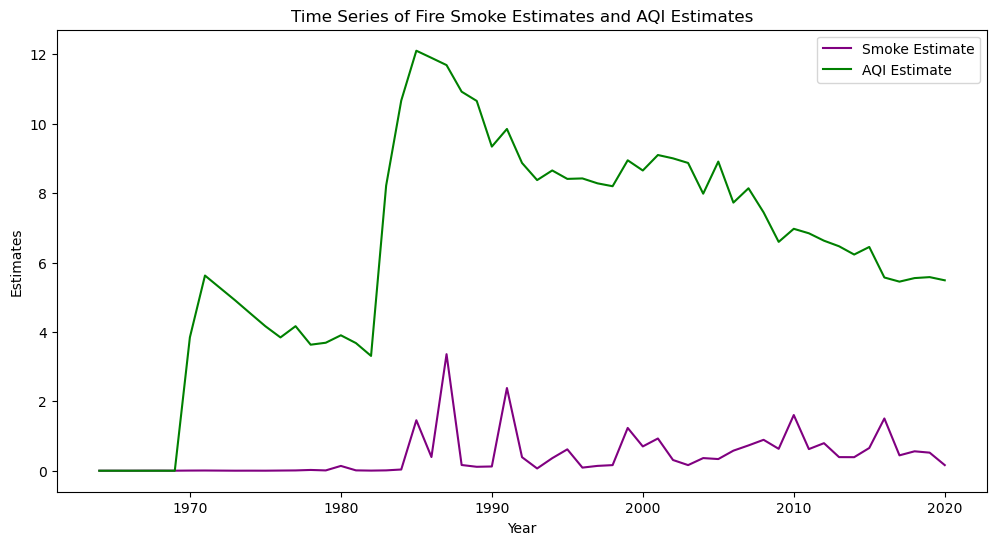

'../images/time_series_fire_smoke_aqi_estimates.png'

<Figure size 640x480 with 0 Axes>

In [150]:
#merge smoke and AQI data on the year column
combined_data = pd.merge(yearly_smoke_estimate, avg_data_pivot_v3, left_on='Fire_Year', right_on='year', how='inner')
print(combined_data.columns)

#plotting the time series for both Smoke Estimate and AQI Estimate
plt.figure(figsize=(12, 6))

#plot Smoke Estimate
plt.plot(combined_data['year'], combined_data['Smoke_Estimate'], label='Smoke Estimate', color='purple')

#plot AQI Estimate
plt.plot(combined_data['year'], combined_data['Weighted_AQI_Estimate'], label='AQI Estimate', color='green')

#adding labels and title
plt.xlabel("Year")
plt.ylabel("Estimates")
plt.title("Time Series of Fire Smoke Estimates and AQI Estimates")
plt.legend()

plt.show()

file_path = "../images/time_series_fire_smoke_aqi_estimates.png"
plt.savefig(file_path, format='png')
file_path

### Explanation:

This code calculates the correlation between the smoke estimate and AQI estimate, quantifying the relationship between wildfire smoke levels and air quality.

1. **Calculate Correlation**:
   - `correlation = combined_data['Smoke_Estimate'].corr(combined_data['Weighted_AQI_Estimate'])`: Computes the Pearson correlation coefficient between `Smoke_Estimate` and `Weighted_AQI_Estimate`, providing a value between -1 and 1. A positive value indicates a direct relationship, while a negative value shows an inverse relationship.

2. **Display Correlation**:
   - `print(...)`: Outputs the calculated correlation value with four decimal precision.

This correlation helps assess the impact of wildfire smoke on air quality, where a higher positive value suggests a strong association.


In [107]:
#calculate the correlation between Smoke Estimate and AQI Estimate
correlation = combined_data['Smoke_Estimate'].corr(combined_data['Weighted_AQI_Estimate'])

print(f"Correlation between Smoke Estimate and AQI Estimate: {correlation:.4f}")

Correlation between Smoke Estimate and AQI Estimate: 0.4610


### Forecast Iteration 1: ARIMA (Not used finally due to poor prediction)


### Explanation:

This code fits an ARIMA model to the smoke estimates, forecasts the next 25 years (2025–2050), and plots the historical data along with the forecasted values and confidence intervals.

1. **Fit ARIMA Model**:
   - `model = ARIMA(yearly_smoke_estimate['Smoke_Estimate'], order=(1, 1, 1))`: Creates an ARIMA model with specified parameters `(p=1, d=1, q=1)`. Adjustments to the `order` parameter may improve the model’s fit.
   - `model_fit = model.fit()`: Fits the ARIMA model to the historical `Smoke_Estimate` data.

2. **Forecast the Next 25 Years**:
   - `forecast = model_fit.get_forecast(steps=forecast_years)`: Forecasts 25 steps ahead, providing point estimates and confidence intervals.
   - `forecast_index`: Generates a range of years (2025–2050) as the index for the forecast.
   - `forecast_values = forecast.predicted_mean`: Retrieves forecasted smoke estimates.
   - `conf_int = forecast.conf_int()`: Retrieves the 95% confidence intervals for each forecasted value.

3. **Create Forecast DataFrame**:
   - `forecast_df`: Constructs a DataFrame with forecasted values, including lower and upper confidence intervals for each year.

4. **Plot Historical Data and Forecast**:
   - `plt.plot(...)`: Plots the historical `Smoke_Estimate` and forecasted values.
   - `plt.fill_between(...)`: Shades the area between the lower and upper confidence intervals to illustrate forecast uncertainty.
   - Adds labels, title, and legend for clarity.

5. **Display Forecast Values**:
   - `print(forecast_df)`: Outputs the forecasted smoke estimates for 2025–2050 along with confidence intervals.

This analysis provides insights into potential future smoke estimates and their associated uncertainties.


/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: N

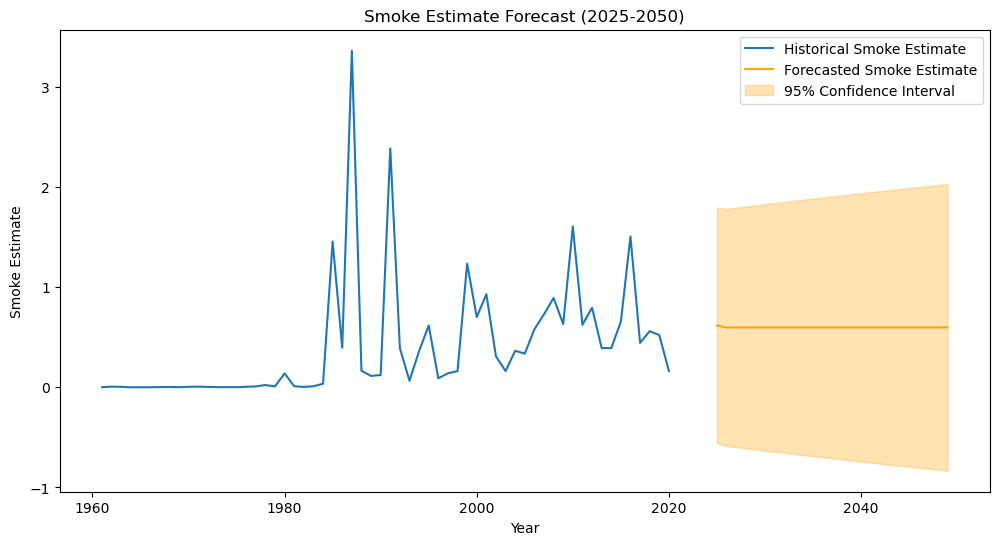

    Year  Smoke_Estimate_Forecast  Lower_CI  Upper_CI
59  2025                 0.617119 -0.559216  1.793453
60  2026                 0.596573 -0.586091  1.779238
61  2027                 0.597500 -0.597287  1.792288
62  2028                 0.597459 -0.609030  1.803947
63  2029                 0.597461 -0.620630  1.815551
64  2030                 0.597460 -0.632122  1.827043
65  2031                 0.597460 -0.643507  1.838428
66  2032                 0.597460 -0.654789  1.849710
67  2033                 0.597460 -0.665970  1.860891
68  2034                 0.597460 -0.677053  1.871974
69  2035                 0.597460 -0.688041  1.882962
70  2036                 0.597460 -0.698935  1.893856
71  2037                 0.597460 -0.709739  1.904660
72  2038                 0.597460 -0.720454  1.915375
73  2039                 0.597460 -0.731083  1.926004
74  2040                 0.597460 -0.741627  1.936548
75  2041                 0.597460 -0.752089  1.947010
76  2042                 0.5

In [112]:
#fit an ARIMA model to the smoke estimates
model = ARIMA(yearly_smoke_estimate['Smoke_Estimate'], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

#forecast the next 25 years (2025-2050)
forecast_years = 25
forecast = model_fit.get_forecast(steps=forecast_years)
forecast_index = range(2025, 2025 + forecast_years)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

#create a DataFrame for the forecast results
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'Smoke_Estimate_Forecast': forecast_values,
    'Lower_CI': conf_int.iloc[:, 0],
    'Upper_CI': conf_int.iloc[:, 1]
})

#plot the original data and the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(yearly_smoke_estimate.index, yearly_smoke_estimate['Smoke_Estimate'], label='Historical Smoke Estimate')
plt.plot(forecast_df['Year'], forecast_df['Smoke_Estimate_Forecast'], label='Forecasted Smoke Estimate', color='orange')
plt.fill_between(forecast_df['Year'], forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='orange', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.title('Smoke Estimate Forecast (2025-2050)')
plt.legend()
plt.show()

#display forecast values with confidence intervals
print(forecast_df)


### Forecast Iteration 2: SARIMA (Final Model)

### Explanation:

This code forecasts smoke estimates for the next 25 years (2025–2050) using a SARIMA model, visualizes the historical and forecasted data with confidence intervals, and saves the plot as an image.

1. **Set Forecast Period**:
   - `forecast_years = 25` and `forecast_index = range(2025, 2025 + forecast_years)`: Specifies a 25-year forecast period, setting up the forecast index for 2025–2050.

2. **Fit SARIMA Model**:
   - `sarima_model = SARIMAX(..., seasonal_order=(1, 1, 1, 12))`: Initializes a SARIMA model with parameters for seasonal components (p=1, d=1, q=1, and seasonal period=12 for annual seasonality).
   - `sarima_fit = sarima_model.fit(...)`: Fits the SARIMA model to the `Smoke_Estimate` data.
   - `sarima_forecast = sarima_fit.get_forecast(steps=forecast_years)`: Generates a 25-year forecast, including confidence intervals.
   - `sarima_forecast_values` and `sarima_conf_int`: Extracts forecasted values and confidence intervals.

3. **Plot Historical and Forecasted Data**:
   - `plt.plot(...)`: Plots historical data and the SARIMA forecast, with labels for each series.
   - `plt.fill_between(...)`: Shades the confidence interval area to display forecast uncertainty.
   - Adds labels, title, and legend for clear presentation.

4. **Display Forecasted Data**:
   - `forecast_df = pd.DataFrame(...)`: Constructs a DataFrame of forecasted values for each year in the forecast period.
   - `print(forecast_df)`: Displays the forecasted values for reference.

5. **Save the Plot**:
   - `file_path = "../images/smoke_estimate_forecast_sarima.jpg"` and `plt.savefig(...)`: Saves the plot as a `.jpg` image at the specified path.

This SARIMA model forecast offers a seasonally adjusted view of potential smoke estimates, along with a visual confidence range for each forecasted year.



/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/bas

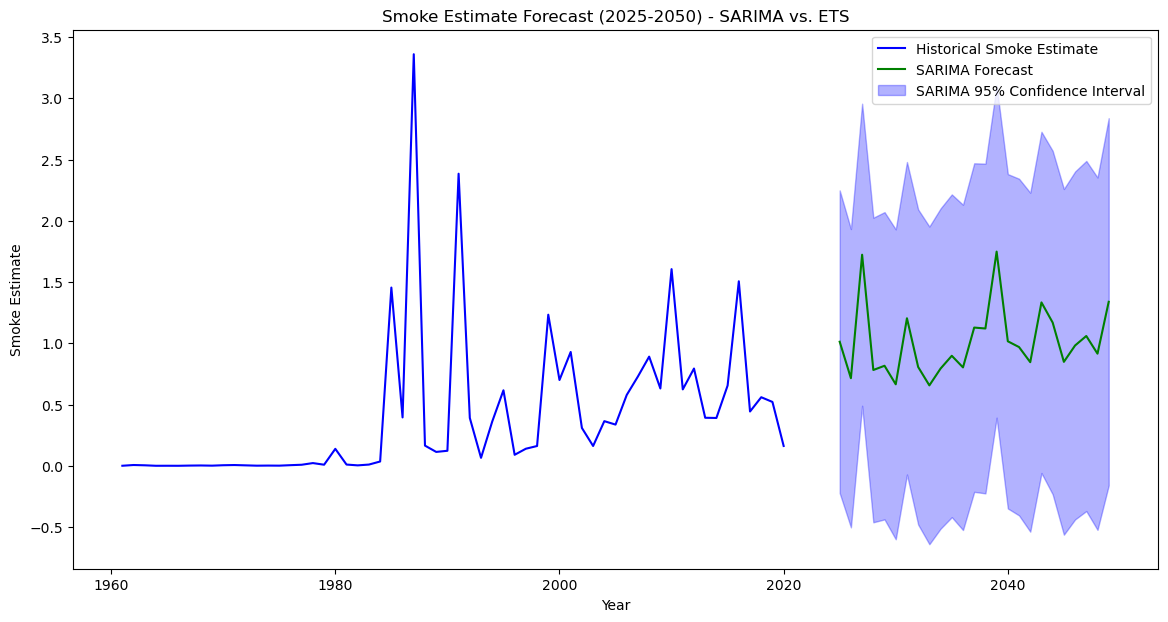

    Year  SARIMA_Forecast
59  2025         1.012580
60  2026         0.714872
61  2027         1.722846
62  2028         0.781899
63  2029         0.816429
64  2030         0.665058
65  2031         1.204284
66  2032         0.806378
67  2033         0.656298
68  2034         0.793758
69  2035         0.897898
70  2036         0.803082
71  2037         1.128223
72  2038         1.120580
73  2039         1.748164
74  2040         1.016272
75  2041         0.969032
76  2042         0.845665
77  2043         1.333598
78  2044         1.169048
79  2045         0.848412
80  2046         0.981953
81  2047         1.059432
82  2048         0.915196
83  2049         1.338548


In [153]:
#forecasting for the next 25 years (2025-2050)
forecast_years = 25
forecast_index = range(2025, 2025 + forecast_years)

#SARIMA Model
sarima_model = SARIMAX(yearly_smoke_estimate['Smoke_Estimate'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.get_forecast(steps=forecast_years)
sarima_forecast_values = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()


#plotting the results
plt.figure(figsize=(14, 7))

#historical Data
plt.plot(yearly_smoke_estimate.index, yearly_smoke_estimate['Smoke_Estimate'], label='Historical Smoke Estimate', color='blue')

#SARIMA Forecast
plt.plot(forecast_index, sarima_forecast_values, label='SARIMA Forecast', color='green')
plt.fill_between(forecast_index, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='blue', alpha=0.3, label='SARIMA 95% Confidence Interval')

#labelling the plot
plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.title('Smoke Estimate Forecast (2025-2050) - SARIMA vs. ETS')
plt.legend()
plt.show()

forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'SARIMA_Forecast': sarima_forecast_values})
print(forecast_df)


file_path = "../images/smoke_estimate_forecast_sarima.png"
plt.savefig(file_path, format='png')
# file_path
plt.close()



### Rationale for Using SARIMA over ARIMA for Smoke Estimate Forecasting:

#### Initial ARIMA Model
When we first applied an **ARIMA** model to forecast smoke estimates, we found it struggled to capture the data's underlying variability and any implicit seasonal cycles. ARIMA, while useful for non-seasonal data, tends to produce oversimplified or flat forecasts when there are cyclical variations or complex dependencies over time.

#### Why SARIMA Outperformed ARIMA
The **SARIMA (Seasonal ARIMA)** model incorporates a seasonal component, which helps to capture both short-term trends and cyclical behaviors even if explicit seasonal information isn't evident in the data. Here's why SARIMA was a more suitable choice for our smoke estimate data:

1. **Capturing Long-Term Trends and Cycles**:
   - **ARIMA**: Primarily models trends and short-term dependencies, lacking a seasonal component. Without the ability to model periodic behavior, ARIMA forecasts were less responsive to any implicit cycles in the data.
   - **SARIMA**: Adds a seasonal order, allowing the model to detect patterns that recur over a specified period. By setting a seasonal order (e.g., `(1, 1, 1, 12)` for yearly periodicity), SARIMA captures subtle cycles that enhance the forecast's accuracy, aligning predictions with historical fluctuations.

2. **Flexibility with Non-Stationary Data**:
   - **ARIMA**: Requires the data to be stationary, which often involves differencing or transformation. ARIMA models struggle with time series data containing trends, seasonality, or other non-stationary behaviors.
   - **SARIMA**: Handles non-stationary data more effectively through seasonal differencing, which allowed SARIMA to adapt better to the smoke estimate data. This added flexibility results in more accurate forecasts without excessive data transformation.

3. **Handling Cyclical or Repeating Patterns**:
   - **ARIMA**: Misses any repeating behavior, producing forecasts that can oversimplify the data’s natural fluctuations.
   - **SARIMA**: Accounts for autoregressive and differencing terms with a seasonal component, helping it detect repeating or subtle periodic variations. Even if these variations are not strictly “seasonal” in the traditional sense, SARIMA can incorporate these cycles into its forecasts, providing a better fit.

4. **Improved Confidence Intervals**:
   - **ARIMA**: Produces confidence intervals that widen over time, which may not accurately reflect uncertainty if the data has periodic behavior.
   - **SARIMA**: Adjusts confidence intervals by accounting for cyclic behavior, giving more meaningful and realistic bounds around future estimates.

### Summary
**SARIMA** was ultimately the better model for forecasting smoke estimates because:
- It adapted to any cyclic patterns in the data, even without explicit seasonality.
- It better modeled long-term variability, reducing the tendency to oversimplify.
- It provided confidence intervals that realistically accounted for potential fluctuations.

Using SARIMA improved forecast accuracy, making it a better fit for datasets with implicit cycles, long-term trends, or repeating behaviors.
